In [1]:
from scipy import stats; 
import numpy as np; 
import matplotlib.pyplot as plt 
import pymc as pm;
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
n = 100

loc_true,scale_true,df_true = 10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution

In [3]:
model = pm.Model()
with model: 
    scale_prior = pm.HalfNormal('scale_prior', sigma=5)
    loc_prior = pm.Normal('loc_prior', mu=0, sigma=10)
    df_prior = pm.DiscreteUniform('df_prior', lower=1, upper=100)

    x_obs = pm.StudentT('likelihood', nu=df_prior, mu=loc_prior, sigma=scale_prior, observed=x)
    

In [4]:
with model:
    idata_MH = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [scale_prior, loc_prior]
>Metropolis: [df_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


MH Split-Rhats {'loc_prior': 1.0016, 'df_prior': 1.0062, 'scale_prior': 1.0001}


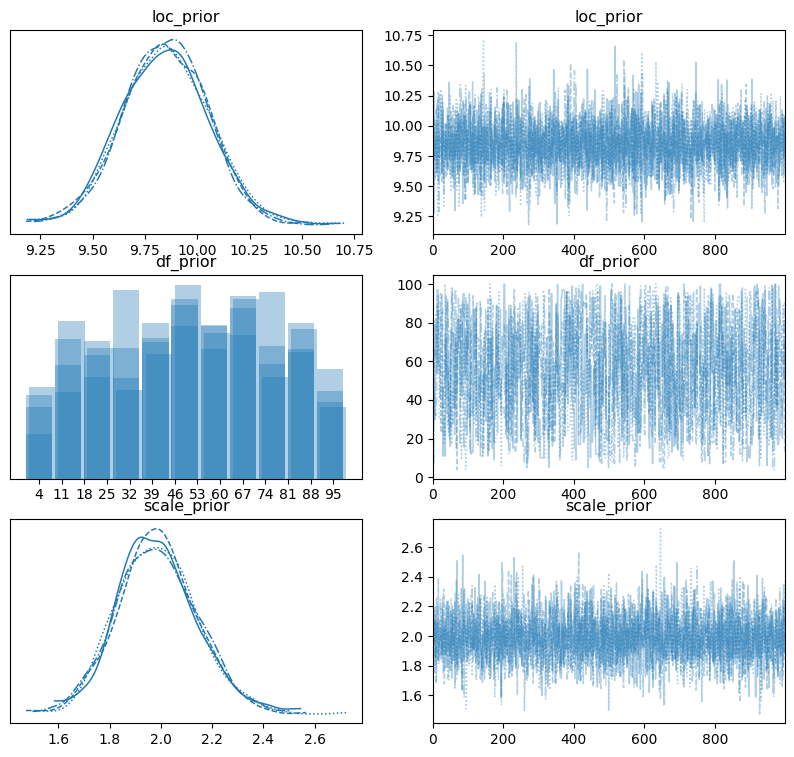

In [5]:
az.plot_trace(idata_MH, figsize=(10, 9));
print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH).items()})

In [6]:
az.summary(idata_MH, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.85,0.21,9.46,10.21,0.00,0.00,4213.54,2705.79,1.00
df_prior,54.77,25.77,15.00,100.00,0.91,0.64,835.66,872.59,1.01
scale_prior,1.99,0.16,1.68,2.26,0.00,0.00,2909.06,2682.79,1.00


c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\Users\Matth\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: 

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

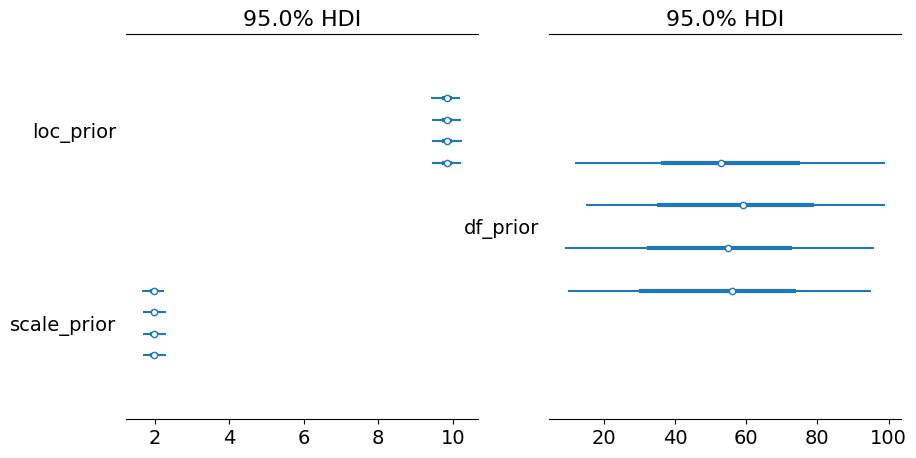

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
az.plot_forest(idata_MH, var_names=["loc_prior","scale_prior"], combined=False, hdi_prob=0.95,ax=ax[0])
az.plot_forest(idata_MH, var_names=["df_prior"], combined=False, hdi_prob=0.95, ax=ax[1])


In [14]:
n = 10000

loc_true,scale_true,df_true = 10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution

model_2 = pm.Model()
with model_2: 
    scale_prior = pm.HalfNormal('scale_prior', sigma=5)
    loc_prior = pm.Normal('loc_prior', mu=0, sigma=10)
    df_prior = pm.DiscreteUniform('df_prior', lower=1, upper=100)

    x_obs = pm.StudentT('likelihood', nu=df_prior, mu=loc_prior, sigma=scale_prior, observed=x)

with model_2:
    idata_MH_2 = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [scale_prior, loc_prior]
>Metropolis: [df_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


MH Split-Rhats {'loc_prior': 1.0011, 'df_prior': 1.013, 'scale_prior': 1.0045}


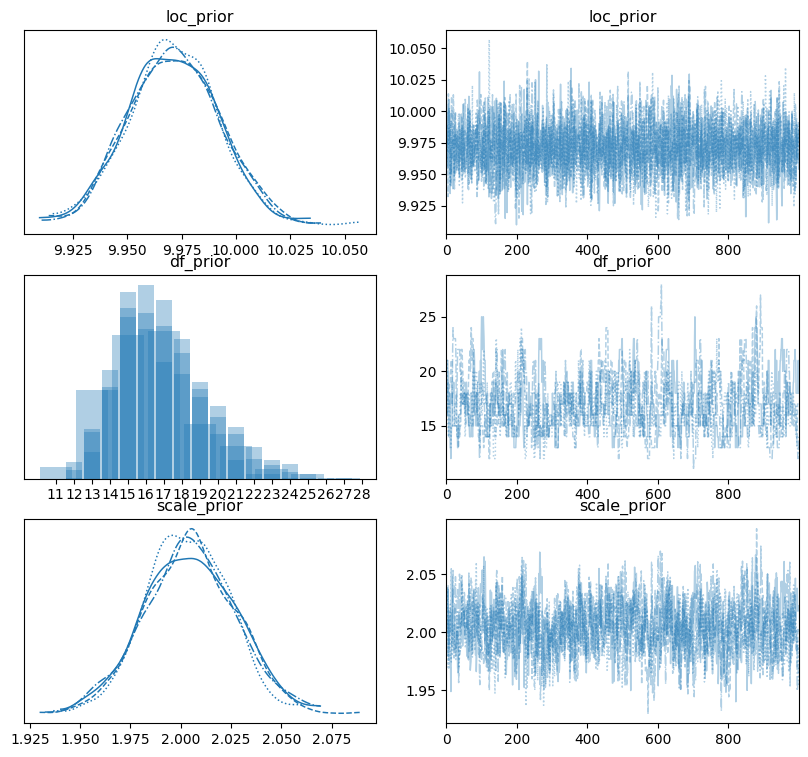

In [15]:
az.plot_trace(idata_MH_2, figsize=(10, 9));
print('MH Split-Rhats',{k: np.round(v.values,4) for k,v in az.rhat(idata_MH_2).items()})

In [16]:
az.summary(idata_MH_2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc_prior,9.97,0.02,9.93,10.01,0.00,0.0,3050.16,2611.03,1.00
df_prior,16.85,2.46,13.00,21.00,0.14,0.1,328.33,562.68,1.01
scale_prior,2.00,0.02,1.96,2.05,0.00,0.0,496.82,984.44,1.00
